### Seeds: Random effect logistic regression

In [8]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# scipy for algorithms
import scipy as sc
from scipy import stats
from scipy.stats import binom

# pymc3 for Bayesian Inference, pymc built on t
import pymc3 as pm
import theano.tensor as tt
from scipy import optimize
import arviz as az

# matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib

In [9]:
# Data Input
### data - germinated seeds
r =  np.array([10, 23, 23, 26, 17, 5, 53, 55, 32, 46, 10, 8, 10, 8, 23, 0, 3, 22, 15, 32, 3])

# total seeds
n =  np.array([39, 62, 81, 51, 39, 6, 74, 72, 51, 79, 13, 16, 30, 28, 45, 4, 12, 41, 30, 51, 7])

# seed type
x1 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# root type
x2 = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# number of plates
N =  x1.shape[0]

In [10]:
with pm.Model() as m: 
    
    alpha_0 = pm.Normal('alpha_0', mu=0, sd=1e-6)
    alpha_1 = pm.Normal('alpha_1', mu=0, sd=1e-6)
    alpha_2 = pm.Normal('alpha_2', mu=0, sd=1e-6)
    alpha_12 = pm.Normal('alpha_12', mu=0, sd=1e-6)

    sigma = pm.Uniform('sigma', lower=0, upper=10)
    tau = 1/(pow(sigma, 2))
    
    beta = pm.Normal('beta', mu=0, sd=tau)

    logit_p =  (alpha_0 + alpha_1*x1 + alpha_2*x2 + alpha_12*x1*x2 + beta)
    p = tt.exp(logit_p) / (1 + tt.exp(logit_p))
    
    obs = pm.Binomial('obs', n, p, observed=r)

In [11]:
with m:
    step=pm.HamiltonianMC()
    hmc_trace = pm.sample(draws=5000, step = step, tune=2000, chains=2, cores=2) #target_accept = 0.9, , nuts={'target_accept':0.95}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
Multiprocess sampling (2 chains in 2 jobs)
HamiltonianMC: [beta, sigma, alpha_12, alpha_2, alpha_1, alpha_0]


Sampling 2 chains for 2_000 tune and 5_000 draw iterations (4_000 + 10_000 draws total) took 31 seconds.
There were 128 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.48981680360969637, but should be close to 0.65. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  """Entry point for launching an IPython kernel.
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a 

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha_0,-0.000,0.000,-0.000,0.000,0.000,0.000,2111.0,1590.0,1.00
alpha_1,-0.000,0.000,-0.000,0.000,0.000,0.000,2720.0,1458.0,1.00
alpha_2,-0.000,0.000,-0.000,0.000,0.000,0.000,3605.0,3723.0,1.00
alpha_12,-0.000,0.000,-0.000,0.000,0.000,0.000,3081.0,3341.0,1.00
beta,0.010,0.036,-0.051,0.089,0.001,0.001,2016.0,1316.0,1.00
sigma,6.354,2.305,2.474,9.920,0.076,0.058,749.0,441.0,1.01


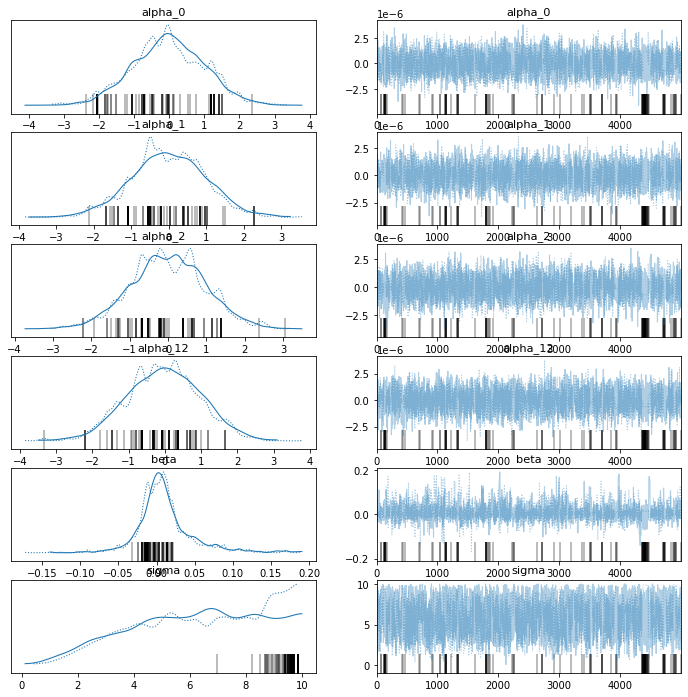

In [12]:
pm.traceplot(hmc_trace)
pm.summary(hmc_trace)

In [13]:
with m:
    advi_fit = pm.fit(method=pm.ADVI(), n=30000)  

Finished [100%]: Average Loss = 1.174e+07


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha_0,-0.000,0.002,-0.004,0.004,0.000,0.000,9352.0,9604.0,NaN
alpha_1,0.001,0.002,-0.003,0.005,0.000,0.000,10353.0,9960.0,NaN
alpha_2,-0.000,0.002,-0.004,0.004,0.000,0.000,10042.0,10198.0,NaN
alpha_12,-0.001,0.002,-0.005,0.003,0.000,0.000,9594.0,9918.0,NaN
beta,0.007,0.036,-0.062,0.074,0.000,0.000,9937.0,9838.0,NaN
sigma,5.013,1.802,1.794,8.257,0.018,0.013,10000.0,9820.0,NaN


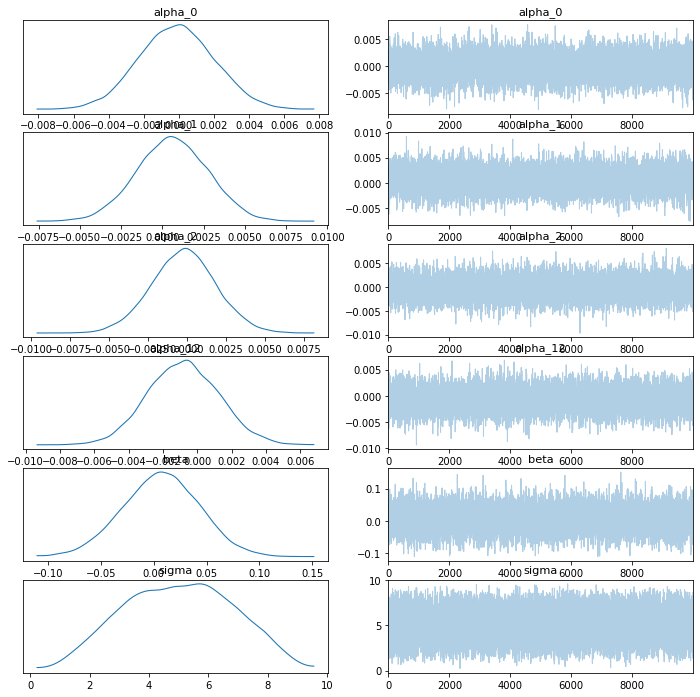

In [14]:
advi_trace = advi_fit.sample(10000)
pm.traceplot(advi_trace)
pm.summary(advi_trace)